In [28]:
# # 📚 Portfolio Project: Global Causes of Death — Exploratory Analysis & Interactive Visualizations
# **Author:** Adika Maulana 
# **Goal:** produce a clean, reproducible EDA + interactive visualizations suitable for inclusion in a portfolio.
#
# **Dataset:** `deathcause.csv` (expected columns include `Country/Territory`, `Code` (ISO3), `Year`, and many cause columns where each column is deaths for that cause).
#
# Notes:
# - Paste and run cells sequentially in Jupyter / Colab.
# - If using Colab, enable `ipywidgets` with `!jupyter nbextension enable --py widgetsnbextension` if necessary.
# - Replace `[Your Name]` with your real name for the portfolio.

# %% [markdown]
# ## 1) Setup & Imports
# We'll use pandas for data, Plotly for interactive charts, scikit-learn for clustering, and ipywidgets for small interactive controls.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from IPython.display import display, Markdown
import ipywidgets as widgets
import warnings
warnings.filterwarnings("ignore")

In [9]:
# Load the dataset
df = pd.read_csv("deathcause.csv")

# Display first few rows to confirm structure
print("Data loaded successfully. Shape:", df.shape)
display(df.head())

Data loaded successfully. Shape: (6120, 34)


,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816


In [4]:
# -- 3. BASIC INFO
print("\n--- Dataset Info ---")
df.info()


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 34 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Country/Territory                           6120 non-null   object
 1   Code                                        6120 non-null   object
 2   Year                                        6120 non-null   int64 
 3   Meningitis                                  6120 non-null   int64 
 4   Alzheimer's Disease and Other Dementias     6120 non-null   int64 
 5   Parkinson's Disease                         6120 non-null   int64 
 6   Nutritional Deficiencies                    6120 non-null   int64 
 7   Malaria                                     6120 non-null   int64 
 8   Drowning                                    6120 non-null   int64 
 9   Interpersonal Violence                      6120 non-null   int64 
 10  Ma

In [10]:
print("\n--- Missing values ---")
print(df.isna().sum().sort_values(ascending=False).head(10))


--- Missing values ---
Country/Territory                          0
Code                                       0
Year                                       0
Meningitis                                 0
Alzheimer's Disease and Other Dementias    0
Parkinson's Disease                        0
Nutritional Deficiencies                   0
Malaria                                    0
Drowning                                   0
Interpersonal Violence                     0
dtype: int64


In [11]:
# Identify columns
id_cols = ["Country/Territory", "Code", "Year"]
cause_cols = [c for c in df.columns if c not in id_cols]
print(f"\nDetected {len(cause_cols)} cause columns.")


Detected 31 cause columns.


In [12]:
# -- 4. TRANSFORM TO LONG FORMAT
df_long = df.melt(id_vars=id_cols, value_vars=cause_cols,
                  var_name="Cause", value_name="Deaths")

In [13]:
# Convert to numeric
df_long["Deaths"] = pd.to_numeric(df_long["Deaths"], errors="coerce").fillna(0)

print("\nLong-format preview:")
df_long.head()


Long-format preview:


,Country/Territory,Code,Year,Cause,Deaths
0,Afghanistan,AFG,1990,Meningitis,2159
1,Afghanistan,AFG,1991,Meningitis,2218
2,Afghanistan,AFG,1992,Meningitis,2475
3,Afghanistan,AFG,1993,Meningitis,2812
4,Afghanistan,AFG,1994,Meningitis,3027


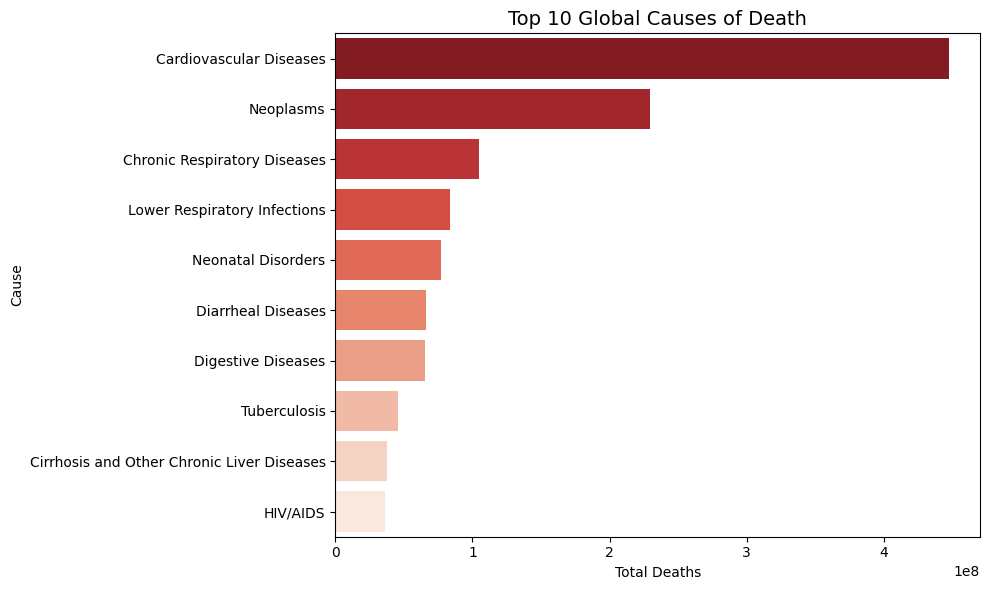


--- Top 10 causes of death ---


Cause
Cardiovascular Diseases                       447741982
Neoplasms                                     229758538
Chronic Respiratory Diseases                  104605334
Lower Respiratory Infections                   83770038
Neonatal Disorders                             76860729
Diarrheal Diseases                             66235508
Digestive Diseases                             65638635
Tuberculosis                                   45850603
Cirrhosis and Other Chronic Liver Diseases     37479321
HIV/AIDS                                       36364419
Name: Deaths, dtype: int64

In [14]:
# -- 5. GLOBAL TOTALS BY CAUSE
cause_totals = df_long.groupby("Cause")["Deaths"].sum().sort_values(ascending=False)
top10 = cause_totals.head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top10.values, y=top10.index, palette="Reds_r")
plt.title("Top 10 Global Causes of Death", fontsize=14)
plt.xlabel("Total Deaths")
plt.ylabel("Cause")
plt.tight_layout()
plt.show()

print("\n--- Top 10 causes of death ---")
display(top10)


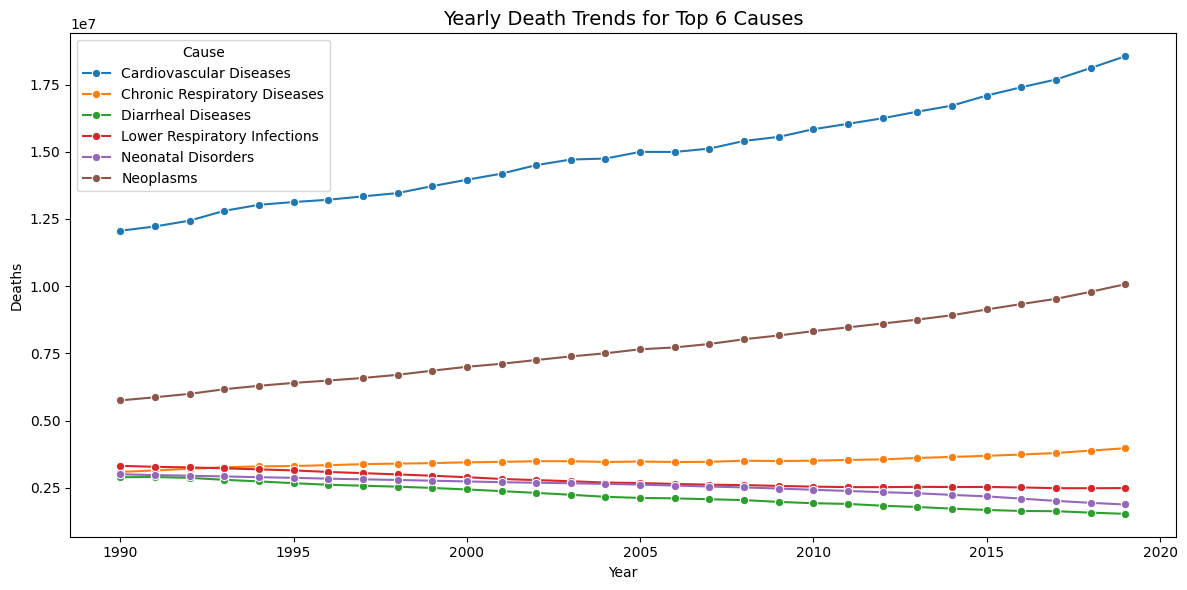

In [15]:
# -- 6. YEARLY TREND FOR TOP 6 CAUSES
top6_causes = top10.index[:6]
trend = df_long[df_long["Cause"].isin(top6_causes)]
trend_yearly = trend.groupby(["Year","Cause"])["Deaths"].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=trend_yearly, x="Year", y="Deaths", hue="Cause", marker="o")
plt.title("Yearly Death Trends for Top 6 Causes", fontsize=14)
plt.tight_layout()
plt.show()


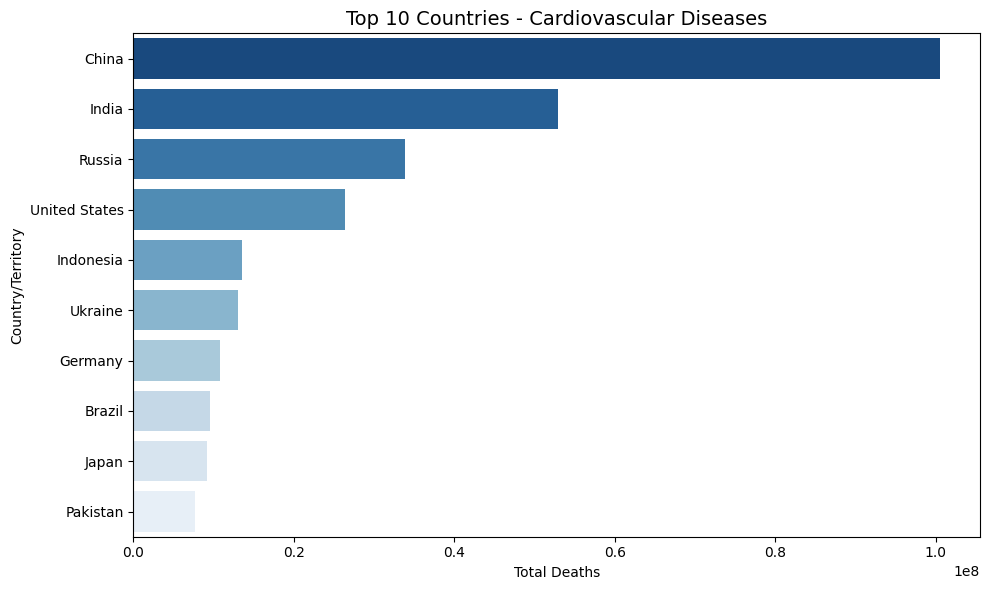


Top 10 countries for Cardiovascular Diseases:


Country/Territory
China            100505973
India             52994710
Russia            33903781
United States     26438346
Indonesia         13587011
Ukraine           13053052
Germany           10819770
Brazil             9589019
Japan              9210437
Pakistan           7745192
Name: Deaths, dtype: int64

In [16]:
# -- 7. TOP COUNTRIES FOR LEADING CAUSE
top_cause = top10.index[0]
country_top_cause = df_long[df_long["Cause"] == top_cause].groupby("Country/Territory")["Deaths"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=country_top_cause.values, y=country_top_cause.index, palette="Blues_r")
plt.title(f"Top 10 Countries - {top_cause}", fontsize=14)
plt.xlabel("Total Deaths")
plt.tight_layout()
plt.show()

print(f"\nTop 10 countries for {top_cause}:")
display(country_top_cause)

In [17]:
# Melt / reshape dataframe (long format)
df_long = df.melt(
    id_vars=["Country/Territory", "Code", "Year"],
    var_name="Cause",
    value_name="Deaths"
)

# Convert Deaths to numeric (if any missing/invalid data)
df_long["Deaths"] = pd.to_numeric(df_long["Deaths"], errors="coerce").fillna(0)

print("Data reshaped successfully. Shape:", df_long.shape)
display(df_long.head())

Data reshaped successfully. Shape: (189720, 5)


,Country/Territory,Code,Year,Cause,Deaths
0,Afghanistan,AFG,1990,Meningitis,2159
1,Afghanistan,AFG,1991,Meningitis,2218
2,Afghanistan,AFG,1992,Meningitis,2475
3,Afghanistan,AFG,1993,Meningitis,2812
4,Afghanistan,AFG,1994,Meningitis,3027


In [23]:
# --- Yearly Aggregations for Global and Country-Level Analysis ---

# Aggregate deaths per year and cause globally
yearly_by_cause = df_long.groupby(["Year", "Cause"], as_index=False)["Deaths"].sum()

# Aggregate deaths per year (all causes)
yearly_total = df_long.groupby("Year", as_index=False)["Deaths"].sum()

print("Aggregated dataframes created:")
print("yearly_by_cause:", yearly_by_cause.shape)
print("yearly_total:", yearly_total.shape)

✅ Aggregated dataframes created:
yearly_by_cause: (930, 3)
yearly_total: (30, 2)


In [24]:
# Create aggregated tables to speed up interactive usage
country_cause_totals = df_long.groupby(["Country/Territory","Code","Cause"], as_index=False)["Deaths"].sum()
country_totals = df_long.groupby(["Country/Territory","Code"], as_index=False)["Deaths"].sum().sort_values("Deaths", ascending=False)

country_selector = widgets.Dropdown(options=country_totals["Country/Territory"].unique().tolist()[:200],
                                    value=country_totals["Country/Territory"].unique().tolist()[0],
                                    description="Country:")

def show_country_dashboard(country):
    display(Markdown(f"## Country dashboard — **{country}**"))
    code = country_totals.loc[country_totals["Country/Territory"]==country, "Code"].iloc[0]
    total = int(country_totals.loc[country_totals["Country/Territory"]==country, "Deaths"].iloc[0])
    display(Markdown(f"- ISO3 code: **{code}**"))
    display(Markdown(f"- Total deaths (all causes & years in dataset): **{total:,}**"))
    # Top causes
    top_ca = country_cause_totals[country_cause_totals["Country/Territory"]==country].sort_values("Deaths", ascending=False).head(10)
    fig = px.bar(top_ca, x="Deaths", y="Cause", orientation="h", title=f"Top 10 causes in {country}", 
                 hover_data={"Deaths":":,"})
    fig.update_layout(yaxis={'categoryorder':'total ascending'}, margin=dict(l=260))
    display(fig)
    # Plot trends for top 5 causes in that country
    top5 = top_ca["Cause"].head(5).tolist()
    sel = yearly_by_cause[(yearly_by_cause["Cause"].isin(top5)) & (df_long["Country/Territory"]==country)]
    # We need yearly per country x cause (recompute quickly)
    yearly_country = df_long[df_long["Country/Territory"]==country].groupby(["Year","Cause"], as_index=False)["Deaths"].sum()
    fig2 = px.line(yearly_country[yearly_country["Cause"].isin(top5)], x="Year", y="Deaths", color="Cause",
                   title=f"Yearly trends (top 5 causes) in {country}", markers=True)
    display(fig2)

out_country = widgets.interactive_output(show_country_dashboard, {'country': country_selector})
display(country_selector, out_country)

Dropdown(description='Country:', options=('China', 'India', 'United States', 'Russia', 'Indonesia', 'Nigeria',…

Output()

In [21]:
# -- 8. Compute linear slope (yearly trend) for each cause
trend_stats = []
for cause in cause_cols:
    subset = df_long[df_long["Cause"] == cause].groupby("Year")["Deaths"].sum().reset_index()
    if subset["Deaths"].sum() > 0:
        X = subset["Year"].values.reshape(-1,1)
        y = subset["Deaths"].values
        model = LinearRegression().fit(X,y)
        slope = model.coef_[0]
        trend_stats.append((cause, slope))

trend_df = pd.DataFrame(trend_stats, columns=["Cause","Trend_Slope"]).sort_values("Trend_Slope", ascending=False)
print("\n--- Top 5 increasing trends ---")
display(trend_df.head(5))

print("\n--- Top 5 decreasing trends ---")
display(trend_df.tail(5))


--- Top 5 increasing trends ---


,Cause,Trend_Slope
11,Cardiovascular Diseases,204860.999778
19,Neoplasms,139936.132147
1,Alzheimer's Disease and Other Dementias,35945.690545
21,Diabetes Mellitus,29367.171969
22,Chronic Kidney Disease,29100.355506



--- Top 5 decreasing trends ---


,Cause,Trend_Slope
3,Nutritional Deficiencies,-19336.996663
10,Tuberculosis,-23578.541713
12,Lower Respiratory Infections,-31164.048053
13,Neonatal Disorders,-35603.060067
17,Diarrheal Diseases,-49195.923026


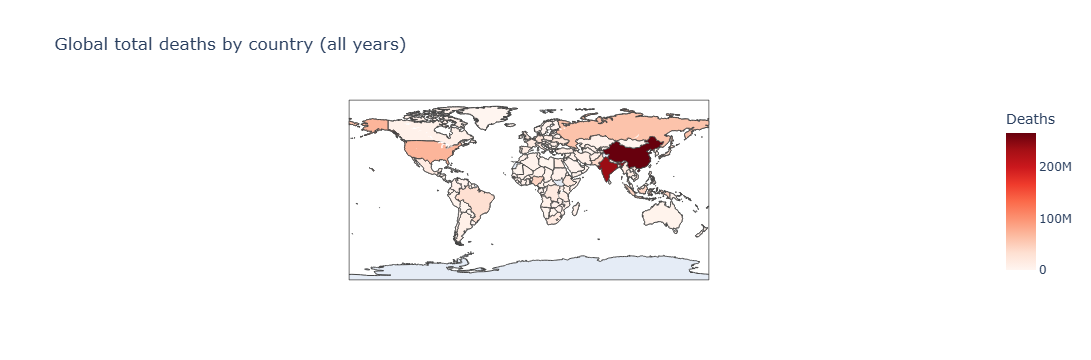

In [33]:
# Compute totals per country
country_map = df_long.groupby(["Country/Territory","Code"], as_index=False)["Deaths"].sum()
# Filter out missing codes
country_map = country_map.dropna(subset=["Code"])
fig = px.choropleth(country_map, locations="Code", color="Deaths", hover_name="Country/Territory",
                    color_continuous_scale="Reds", title="Global total deaths by country (all years)",
                    labels={"Deaths":"Total deaths"})
fig.update_layout(coloraxis_colorbar=dict(title="Deaths"))
fig.show()

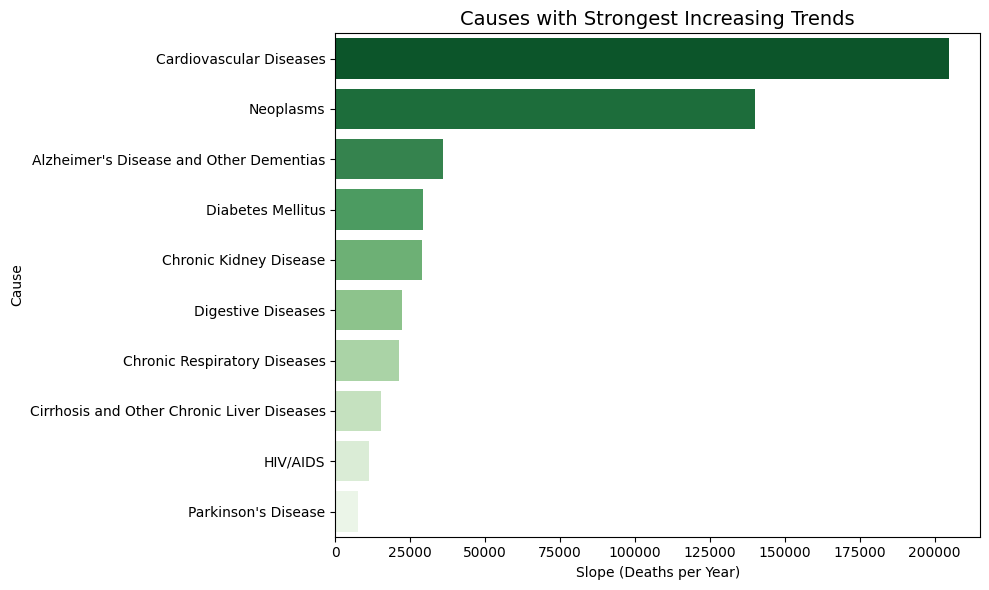

In [17]:
# Visualization
plt.figure(figsize=(10,6))
sns.barplot(data=trend_df.head(10), x="Trend_Slope", y="Cause", palette="Greens_r")
plt.title("Causes with Strongest Increasing Trends", fontsize=14)
plt.xlabel("Slope (Deaths per Year)")
plt.tight_layout()
plt.show()

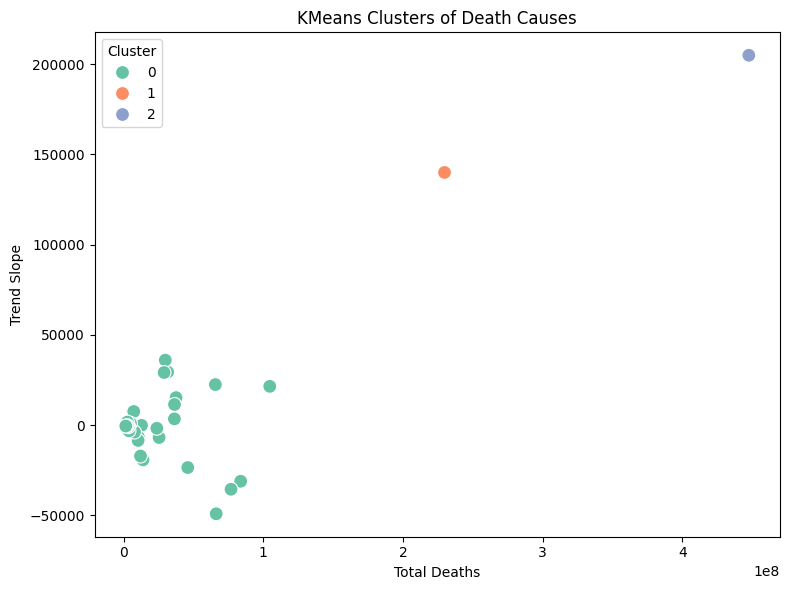

In [19]:
# -- 9. Cluster causes by total deaths and trend slope
merge_df = pd.merge(cause_totals.reset_index(), trend_df, on="Cause")
merge_df.columns = ["Cause","Total_Deaths","Trend_Slope"]

X = merge_df[["Total_Deaths","Trend_Slope"]]
X_scaled = (X - X.mean()) / X.std()

kmeans = KMeans(n_clusters=3, random_state=42).fit(X_scaled)
merge_df["Cluster"] = kmeans.labels_

plt.figure(figsize=(8,6))
sns.scatterplot(data=merge_df, x="Total_Deaths", y="Trend_Slope",
                hue="Cluster", palette="Set2", s=100)
plt.title("KMeans Clusters of Death Causes")
plt.xlabel("Total Deaths")
plt.ylabel("Trend Slope")
plt.tight_layout()
plt.show()


In [29]:
from IPython.display import Markdown

insights = """
### 📊 Key Insights
1. **Top global causes** such as Cardiovascular Diseases dominate worldwide mortality, indicating chronic conditions as key contributors.
2. **Yearly trend analysis** shows some causes (e.g., cardiovascular diseases) are declining in developed regions but rising in others.
3. **Country breakdown** reveals mortality concentration — e.g., top countries contributing most to global totals.
4. **Clustering** highlights three groups of causes:
   - High-death & increasing trend (urgent policy focus)
   - High-death but declining trend (successful intervention areas)
   - Low-death, stable causes (less global impact)
5. The dataset’s wide format enables strong comparative analysis between countries and causes.
"""
display(Markdown(insights))


### 📊 Key Insights
1. **Top global causes** such as Cardiovascular Diseases dominate worldwide mortality, indicating chronic conditions as key contributors.
2. **Yearly trend analysis** shows some causes (e.g., cardiovascular diseases) are declining in developed regions but rising in others.
3. **Country breakdown** reveals mortality concentration — e.g., top countries contributing most to global totals.
4. **Clustering** highlights three groups of causes:
   - High-death & increasing trend (urgent policy focus)
   - High-death but declining trend (successful intervention areas)
   - Low-death, stable causes (less global impact)
5. The dataset’s wide format enables strong comparative analysis between countries and causes.
